# Predicting Social Media Stock Prices

Project by: Lili Balazs, Jared Pippin, Humayun Khan

In [ ]:
import math
from pandas.core.frame import DataFrame
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from google.colab import files
from datascience import * 
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
#upload the socialmediastocks.csv file
uploaded = files.upload()

Saving social_media_stocks.csv to social_media_stocks.csv


In [ ]:
stocks=pd.read_csv('social_media_stocks.csv')
stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0


In [ ]:
stocks.shape

(8398, 8)

In [ ]:
facebook = stocks[stocks['Symbol'] == 'FB']
facebook



,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0
...,...,...,...,...,...,...,...,...
8373,2022-03-31,FB,222.360001,222.360001,228.490005,222.259995,228.449997,24192300.0
8378,2022-04-01,FB,224.850006,224.850006,227.279999,222.699997,224.550003,19533300.0
8383,2022-04-04,FB,233.889999,233.889999,234.350006,225.860001,225.979996,28054800.0
8388,2022-04-05,FB,231.839996,231.839996,236.860001,231.020004,234.080002,29727200.0


In [ ]:
twitter = stocks[stocks['Symbol'] == 'TWTR']
twitter

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
371,2013-11-07,TWTR,44.900002,44.900002,50.090000,44.000000,45.099998,117701600.0
373,2013-11-08,TWTR,41.650002,41.650002,46.939999,40.689999,45.930000,27925300.0
375,2013-11-11,TWTR,42.900002,42.900002,43.000000,39.400002,40.500000,16113900.0
377,2013-11-12,TWTR,41.900002,41.900002,43.779999,41.830002,43.660000,6316700.0
379,2013-11-13,TWTR,42.599998,42.599998,42.869999,40.759998,41.029999,8688300.0
...,...,...,...,...,...,...,...,...
8374,2022-03-31,TWTR,38.689999,38.689999,39.230000,38.410000,39.110001,13208300.0
8379,2022-04-01,TWTR,39.310001,39.310001,39.849998,39.000000,39.160000,12122600.0
8384,2022-04-04,TWTR,49.970001,49.970001,51.369999,46.860001,47.869999,268465400.0
8389,2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0


In [ ]:
snapchat = stocks[stocks['Symbol'] == 'SNAP']
snapchat

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
2511,2017-03-02,SNAP,24.480000,24.480000,26.049999,23.500000,24.000000,217048900.0
2515,2017-03-03,SNAP,27.090000,27.090000,29.440001,26.059999,26.389999,148166400.0
2519,2017-03-06,SNAP,23.770000,23.770000,28.250000,23.770000,28.170000,72903000.0
2523,2017-03-07,SNAP,21.440001,21.440001,22.500000,20.639999,22.209999,71857800.0
2527,2017-03-08,SNAP,22.809999,22.809999,23.430000,21.309999,22.030001,49819100.0
...,...,...,...,...,...,...,...,...
8376,2022-03-31,SNAP,35.990002,35.990002,36.869999,35.764999,36.750000,15777700.0
8381,2022-04-01,SNAP,37.389999,37.389999,38.599998,36.200001,36.200001,25272900.0
8386,2022-04-04,SNAP,39.340000,39.340000,39.570000,37.369999,38.250000,25402800.0
8391,2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0


In [ ]:
facebook['date'] = pd.to_datetime(facebook['Date'])
facebook['date'].dt.to_period('M')
twitter['date'] = pd.to_datetime(twitter['Date'])
twitter['date'].dt.to_period('M')
snapchat['date'] = pd.to_datetime(snapchat['Date'])
snapchat['date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

2511    2017-03
2515    2017-03
2519    2017-03
2523    2017-03
2527    2017-03
         ...   
8376    2022-03
8381    2022-04
8386    2022-04
8391    2022-04
8396    2022-04
Name: date, Length: 1285, dtype: period[M]

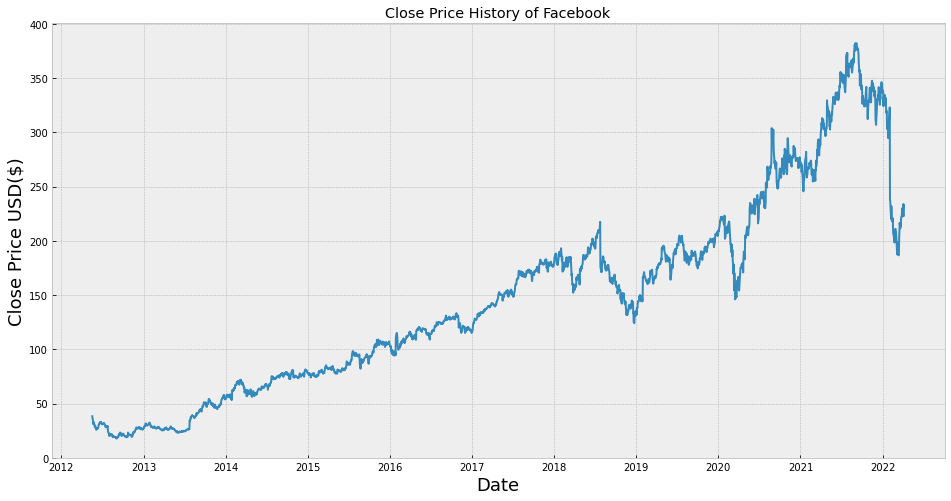

In [ ]:
#visualize facebook stock
plt.figure(figsize=(16,8))
plt.title('Close Price History of Facebook')
plt.plot(facebook['date'],facebook['Close'] )
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

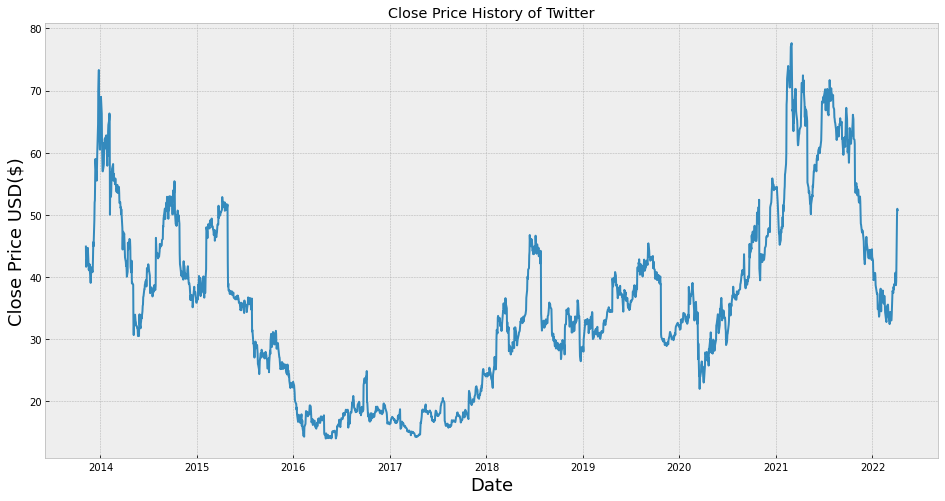

In [ ]:
#visualize twitter stock
plt.figure(figsize=(16,8))
plt.title('Close Price History of Twitter')
plt.plot(twitter['date'],twitter['Close'] )
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

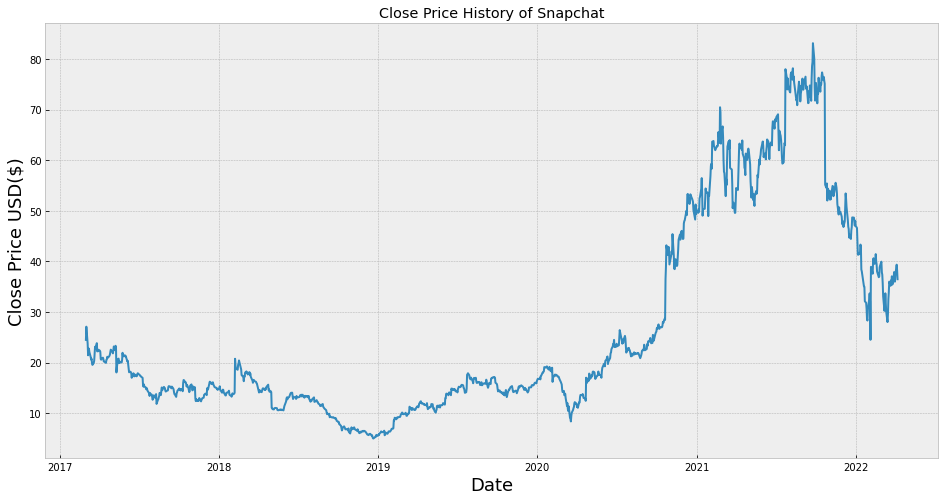

In [ ]:
#visualize snapchat stock
plt.figure(figsize=(16,8))
plt.title('Close Price History of Snapchat')
plt.plot(snapchat['date'],snapchat['Close'] )
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
#----facebook----
data_f=facebook.filter(['Close'])
dataset_f=data_f.values
training_data_len_f= math.ceil(len(dataset_f) * .8)

#scale the data
scaler_f=MinMaxScaler(feature_range=(0,1))
scaled_data_f=scaler_f.fit_transform(dataset_f)

scaled_data_f
#----twitter----
data_t=twitter.filter(['Close'])
dataset_t=data_t.values
training_data_len_t= math.ceil(len(dataset_t) * .8)

#scale the data
scaler_t=MinMaxScaler(feature_range=(0,1))
scaled_data_t=scaler_t.fit_transform(dataset_t)

scaled_data_t
#----snapchat----
data_s=snapchat.filter(['Close'])
dataset_s=data_s.values
training_data_len_s= math.ceil(len(dataset_s) * .8)

#scale the data
scaler_s=MinMaxScaler(feature_range=(0,1))
scaled_data_s=scaler_s.fit_transform(dataset_s)

scaled_data_s

array([[0.24948796],
       [0.28289811],
       [0.24039939],
       ...,
       [0.43970814],
       [0.42575525],
       [0.4029698 ]])

In [ ]:
#Create training data set
#----facebook----
train_data_f=scaled_data_f[0:training_data_len_f,:]

#split the data into x_train and y_train data sets

x_train_f =[]
y_train_f=[]


for i in range(60,len(train_data_f)):
  x_train_f.append(train_data_f[i-60:i,0])
  y_train_f.append(train_data_f[i,0])
  if i<=60:

    print(x_train_f)
    print(y_train_f)
    print()
#----twitter---
#Create training data set

train_data_t=scaled_data_t[0:training_data_len_t,:]

#split the data into x_train and y_train data sets

x_train_t =[]
y_train_t=[]


for i in range(60,len(train_data_t)):
  x_train_t.append(train_data_t[i-60:i,0])
  y_train_t.append(train_data_t[i,0])
  if i<=60:

    print(x_train_t)
    print(y_train_t)
    print()
#----snapchat----
#Create training data set

train_data_s=scaled_data_s[0:training_data_len_s,:]

#split the data into x_train and y_train data sets

x_train_s =[]
y_train_s =[]


for i in range(60,len(train_data_s)):
  x_train_s.append(train_data_s[i-60:i,0])
  y_train_s.append(train_data_s[i,0])
  if i<=60:

    print(x_train_s)
    print(y_train_s)
    print()

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.02491425, 0.02354232, 0.02570998,
       0.02546303, 0.02653313, 0.02617643, 0.02897517, 0.03369461,
       0.03753601, 0.03890795, 0.03805735, 0.03871588, 0.04203594,
       0.03931953, 0.04217314, 0.03978598, 0.03739882, 0.03668542,
       0.03577995, 0.03695981, 0.03770064, 0.03841405, 0.03962134,
       0.03770064, 0.03632871, 0.0358897 , 0.03564275, 0.02886542,
       0.0284264 , 0.03122514, 0.03092331, 0.03026479, 0.03023735,
       0.02941419, 0.03185622, 0.02502401, 0.01640829, 0.01487173,
       0.01092056, 0.00864316, 0.00633832, 0.00921937, 0.01149678,
       0.00820414, 0.00820414, 0.00899986, 0.01119495, 0.01061874])]
[0.007271229711778966]

[array([0.48553918, 0.43445461, 0.45410253, 0.4383842 , 0.44938698,
       0.48223829, 0.47107829, 0.42643823, 0.43602642, 0.42502358,
       0.44089913, 0.42423768, 0.3

In [ ]:
#convert train data to numpy arrays
#Reshape
#----facebook----
x_train_f,y_train_f=np.array(x_train_f),np.array(y_train_f)
x_train_f.shape
#----twitter----
x_train_t,y_train_t=np.array(x_train_t),np.array(y_train_t)
x_train_t.shape
#----snapchat----
x_train_s,y_train_s=np.array(x_train_s),np.array(y_train_s)
x_train_s.shape


(968, 60)

In [ ]:
#----facebook----
x_train_f=np.reshape(x_train_f,(x_train_f.shape[0],x_train_f.shape[1],1))
x_train_f.shape
#----twitter----
x_train_t=np.reshape(x_train_t,(x_train_t.shape[0],x_train_t.shape[1],1))
x_train_t.shape
#----snapchat----
x_train_s=np.reshape(x_train_s,(x_train_s.shape[0],x_train_s.shape[1],1))
x_train_s.shape

(968, 60, 1)

In [ ]:
# build LSTM model
#----facebook----
model_f=Sequential()
model_f.add(LSTM(50,return_sequences=True,input_shape=(x_train_f.shape[1],1)))
model_f.add(LSTM(50,return_sequences=False))
model_f.add(Dense(25))
model_f.add(Dense(1))
#----twitter----
model_t=Sequential()
model_t.add(LSTM(50,return_sequences=True,input_shape=(x_train_t.shape[1],1)))
model_t.add(LSTM(50,return_sequences=False))
model_t.add(Dense(25))
model_t.add(Dense(1))
#----snapchat----
model_s=Sequential()
model_s.add(LSTM(50,return_sequences=True,input_shape=(x_train_s.shape[1],1)))
model_s.add(LSTM(50,return_sequences=False))
model_s.add(Dense(25))
model_s.add(Dense(1))

In [ ]:
#copile the model
#----facebook----
model_f.compile(optimizer='adam',loss='mean_squared_error')
#----twitter----
model_t.compile(optimizer='adam',loss='mean_squared_error')
#----snapchat----
model_s.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
#----facebook----
model_f.fit(x_train_f,y_train_f,batch_size=1,epochs=1)
#----twitter----
model_t.fit(x_train_t,y_train_t,batch_size=1,epochs=1)
#----snapchat----
model_s.fit(x_train_s,y_train_s,batch_size=1,epochs=1)


968/968 [==============================] - 43s 41ms/step - loss: 0.0020


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
#----facebook----
test_data_f=scaled_data_f[training_data_len_f - 60:,:]
#----twitter----
test_data_t=scaled_data_t[training_data_len_t - 60:,:]
#----snapchat----
test_data_s=scaled_data_s[training_data_len_s - 60:,:]

#create the data sets x_test and y_test
#----facebook----
x_test_f=[]
y_test_f=dataset_f[training_data_len_f:,:]
for i in range(60,len(test_data_f)):
  x_test_f.append(test_data_f[i-60:i,0])
#----twitter----
x_test_t=[]
y_test_t=dataset_t[training_data_len_t:,:]
for i in range(60,len(test_data_t)):
  x_test_t.append(test_data_t[i-60:i,0])
#----snapchat----
x_test_s=[]
y_test_s=dataset_s[training_data_len_s:,:]
for i in range(60,len(test_data_s)):
  x_test_s.append(test_data_s[i-60:i,0])

In [ ]:
#convert the data to a numpy array
#reshape
#----facebook----
x_test_f=np.array(x_test_f)
x_test_f=np.reshape(x_test_f,(x_test_f.shape[0],x_test_f.shape[1],1))
#----twitter----
x_test_t=np.array(x_test_t)
x_test_t=np.reshape(x_test_t,(x_test_t.shape[0],x_test_t.shape[1],1))
#----snapchat----
x_test_s=np.array(x_test_s)
x_test_s=np.reshape(x_test_s,(x_test_s.shape[0],x_test_s.shape[1],1))

In [ ]:
#get the models predicted price values
#----facebook----
predictions_f=model_f.predict(x_test_f)
predictions_f=scaler_f.inverse_transform(predictions_f)
#----twitter----
predictions_t=model_t.predict(x_test_t)
predictions_t=scaler_t.inverse_transform(predictions_t)
#----snapchat----
predictions_s=model_s.predict(x_test_s)
predictions_s=scaler_s.inverse_transform(predictions_s)

In [ ]:
#Get the root mean squared error(RMSE)
#----facebook----
rmse_f=np.sqrt( np.mean((predictions_f - y_test_f)**2))
rmse_f
#----twitter----
rmse_t=np.sqrt( np.mean((predictions_t - y_test_t)**2))
rmse_t
#----snapchat----
rmse_s=np.sqrt( np.mean((predictions_s - y_test_s)**2))
rmse_s

6.411685050182588

In [ ]:
#Get the mean absolute percentage error(MAPE)
#----facebook----
mape_f= np.mean(np.abs((y_test_f-predictions_f) / y_test_f)) * 100
mape_f
#----twitter----
mape_t= np.mean(np.abs((y_test_t-predictions_t) / y_test_t)) * 100
mape_t
#----snapchat----
mape_s= np.mean(np.abs((y_test_s-predictions_s) / y_test_s)) * 100
mape_s

9.206876768836231

In [ ]:
#----facebook----
train_f=facebook[:training_data_len_f]
valid_f=facebook[training_data_len_f:]
valid_f['Predictions']=predictions_f
#----twitter----
train_t=twitter[:training_data_len_t]
valid_t=twitter[training_data_len_t:]
valid_t['Predictions']=predictions_t
#----snapchat----
train_s=snapchat[:training_data_len_s]
valid_s=snapchat[training_data_len_s:]
valid_s['Predictions']=predictions_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
train_f

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0,2012-05-18
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0,2012-05-21
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0,2012-05-22
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0,2012-05-23
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0,2012-05-24
...,...,...,...,...,...,...,...,...,...
5888,2020-04-13,FB,174.789993,174.789993,175.000000,169.449997,173.669998,19355400.0,2020-04-13
5893,2020-04-14,FB,178.169998,178.169998,181.229996,176.619995,178.979996,21011800.0,2020-04-14
5898,2020-04-15,FB,176.970001,176.970001,178.190002,172.820007,175.190002,17423000.0,2020-04-15
5903,2020-04-16,FB,176.250000,176.250000,178.050003,172.509995,177.949997,23593200.0,2020-04-16


In [ ]:
#----facebook----
train_f['date'] = pd.to_datetime(train_f['Date'])
train_f['date'].dt.to_period('M')
#----twitter----
train_t['date'] = pd.to_datetime(train_t['Date'])
train_t['date'].dt.to_period('M')
#----snapchat----
train_s['date'] = pd.to_datetime(train_s['Date'])
train_s['date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

2511    2017-03
2515    2017-03
2519    2017-03
2523    2017-03
2527    2017-03
         ...   
7091    2021-03
7096    2021-03
7101    2021-03
7106    2021-03
7111    2021-03
Name: date, Length: 1028, dtype: period[M]

In [ ]:
#----facebook----
valid_f['date'] = pd.to_datetime(valid_f['Date'])
valid_f['date'].dt.to_period('M')
#----twitter----
valid_t['date'] = pd.to_datetime(valid_t['Date'])
valid_t['date'].dt.to_period('M')
#----snapchat----
valid_s['date'] = pd.to_datetime(valid_s['Date'])
valid_s['date'].dt.to_period('M')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

7116    2021-04
7121    2021-04
7126    2021-04
7131    2021-04
7136    2021-04
         ...   
8376    2022-03
8381    2022-04
8386    2022-04
8391    2022-04
8396    2022-04
Name: date, Length: 257, dtype: period[M]

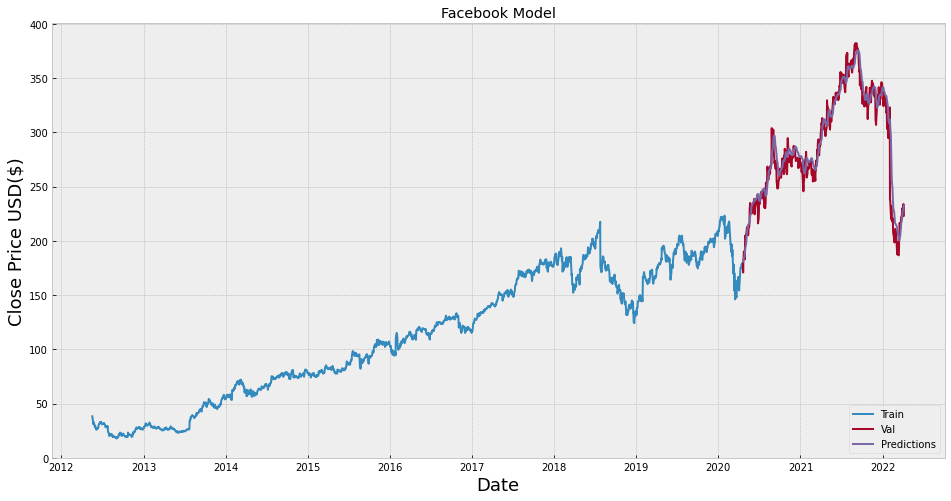

In [ ]:
#visualize the data
#----facebook----
plt.figure(figsize=(16,8))
plt.title('Facebook Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train_f['date'],train_f['Close'])
plt.plot(valid_f['date'],valid_f[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

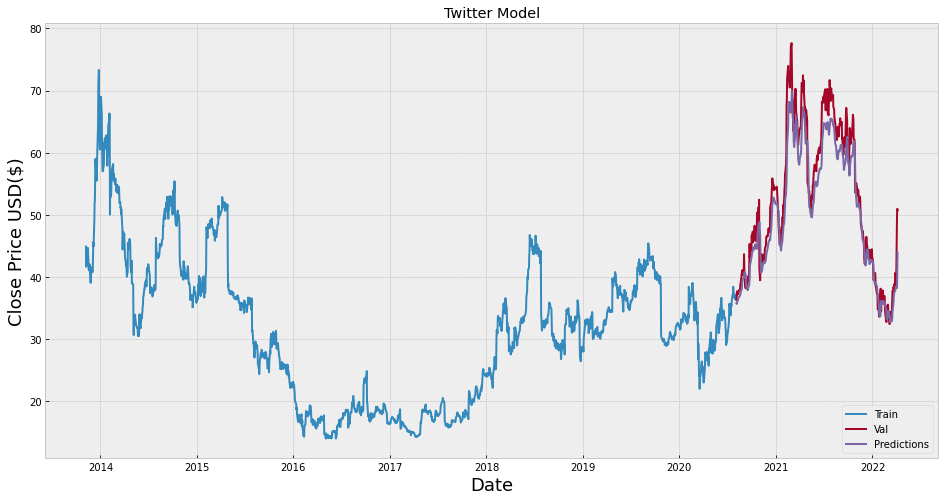

In [ ]:
#visualize the data
#----twitter----
plt.figure(figsize=(16,8))
plt.title('Twitter Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train_t['date'],train_t['Close'])
plt.plot(valid_t['date'],valid_t[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

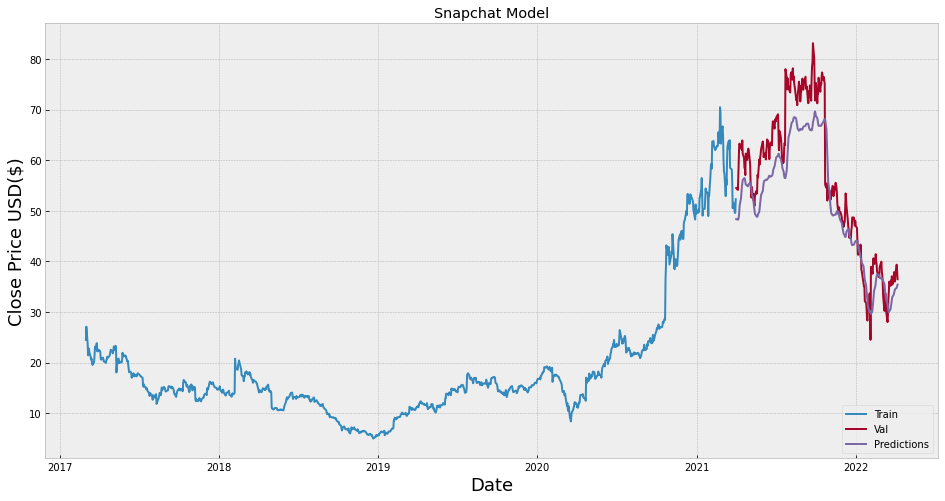

In [ ]:
#visualize the data
#----snapchat----
plt.figure(figsize=(16,8))
plt.title('Snapchat Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train_s['date'],train_s['Close'])
plt.plot(valid_s['date'],valid_s[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

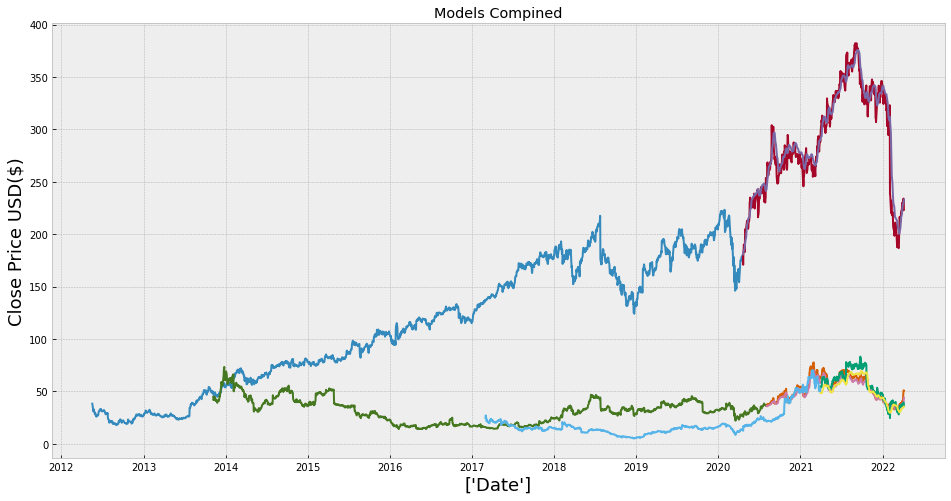

In [ ]:
#compare stocks and its predictions
plt.figure(figsize=(16,8))
plt.title('Models Compined')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train_f['date'],train_f['Close'])
plt.plot(valid_f['date'],valid_f[['Close','Predictions']])
plt.plot(train_t['date'],train_t['Close'])
plt.plot(valid_t['date'],valid_t[['Close','Predictions']])
plt.plot(train_s['date'],train_s['Close'])
plt.plot(valid_s['date'],valid_s[['Close','Predictions']])
#plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [ ]:
valid_f

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,date,Predictions
5913,2020-04-20,FB,178.240005,178.240005,180.500000,176.770004,177.410004,16110700.0,2020-04-20,180.765976
5918,2020-04-21,FB,170.800003,170.800003,175.380005,168.339996,175.250000,24850500.0,2020-04-21,181.923630
5923,2020-04-22,FB,182.279999,182.279999,184.779999,178.139999,178.449997,33242000.0,2020-04-22,182.091156
5928,2020-04-23,FB,185.130005,185.130005,187.050003,183.149994,184.080002,21426600.0,2020-04-23,182.837784
5933,2020-04-24,FB,190.070007,190.070007,190.410004,180.830002,183.229996,28792000.0,2020-04-24,184.080063
...,...,...,...,...,...,...,...,...,...,...
8373,2022-03-31,FB,222.360001,222.360001,228.490005,222.259995,228.449997,24192300.0,2022-03-31,226.792587
8378,2022-04-01,FB,224.850006,224.850006,227.279999,222.699997,224.550003,19533300.0,2022-04-01,228.356949
8383,2022-04-04,FB,233.889999,233.889999,234.350006,225.860001,225.979996,28054800.0,2022-04-04,229.510086
8388,2022-04-05,FB,231.839996,231.839996,236.860001,231.020004,234.080002,29727200.0,2022-04-05,231.209793
